In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import make_scorer,f1_score,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score,roc_curve
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline


Creating functions which are being used repeateadly.

In [3]:
# define a function to print accuracy metrics
def print_accuracy_metrics(Input,Output):
  print("Recall:", recall_score(Input, Output))
  print("Log Loss:", log_loss(Input, Output))
  print("Precision:", precision_score(Input, Output))
  print("Accurcay:", accuracy_score(Input, Output))
  print("AUC: ", roc_auc_score(Input, Output))
  print("F1 Score:", f1_score(Input, Output))
  confusion_matrix_value = confusion_matrix(Input,Output)
  print('Confusion matrix:\n', confusion_matrix_value)
  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # create heatmap
  sns.heatmap(pd.DataFrame( confusion_matrix_value), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

In [4]:
# defined a function to print cross validation score
scoring = {'recall' : make_scorer(recall_score)}
def cross_validation_metrics(log_reg, X, y):
 log_reg_score = cross_val_score(log_reg, X,y,cv=5,scoring='recall')
 print('Logistic Regression Cross Validation Score(Recall): ', round(log_reg_score.mean() * 100, 2))

In [5]:
# function to draw ROC curve
def plot_auc_curve(model,):
  auc = roc_auc_score(y, y_pred_prob)
  fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
  
  plt.plot(fpr, tpr)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.title('ROC Curve\n AUC={auc}'.format(auc = auc))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.grid(True)

In [6]:
### Reading data as a pandas dataframe
data=pd.read_csv('/Users/pooja/Downloads/creditcard.csv.zip')

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Observations

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
#### Checking for null values in dataset
data.isnull().sum().max()

0

In [11]:
#### There are no null values in dataset 
####  Checking for unique values of ids
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

Data is pretty clean and there are no duplicate ids are present now let's check distribution of each feature.

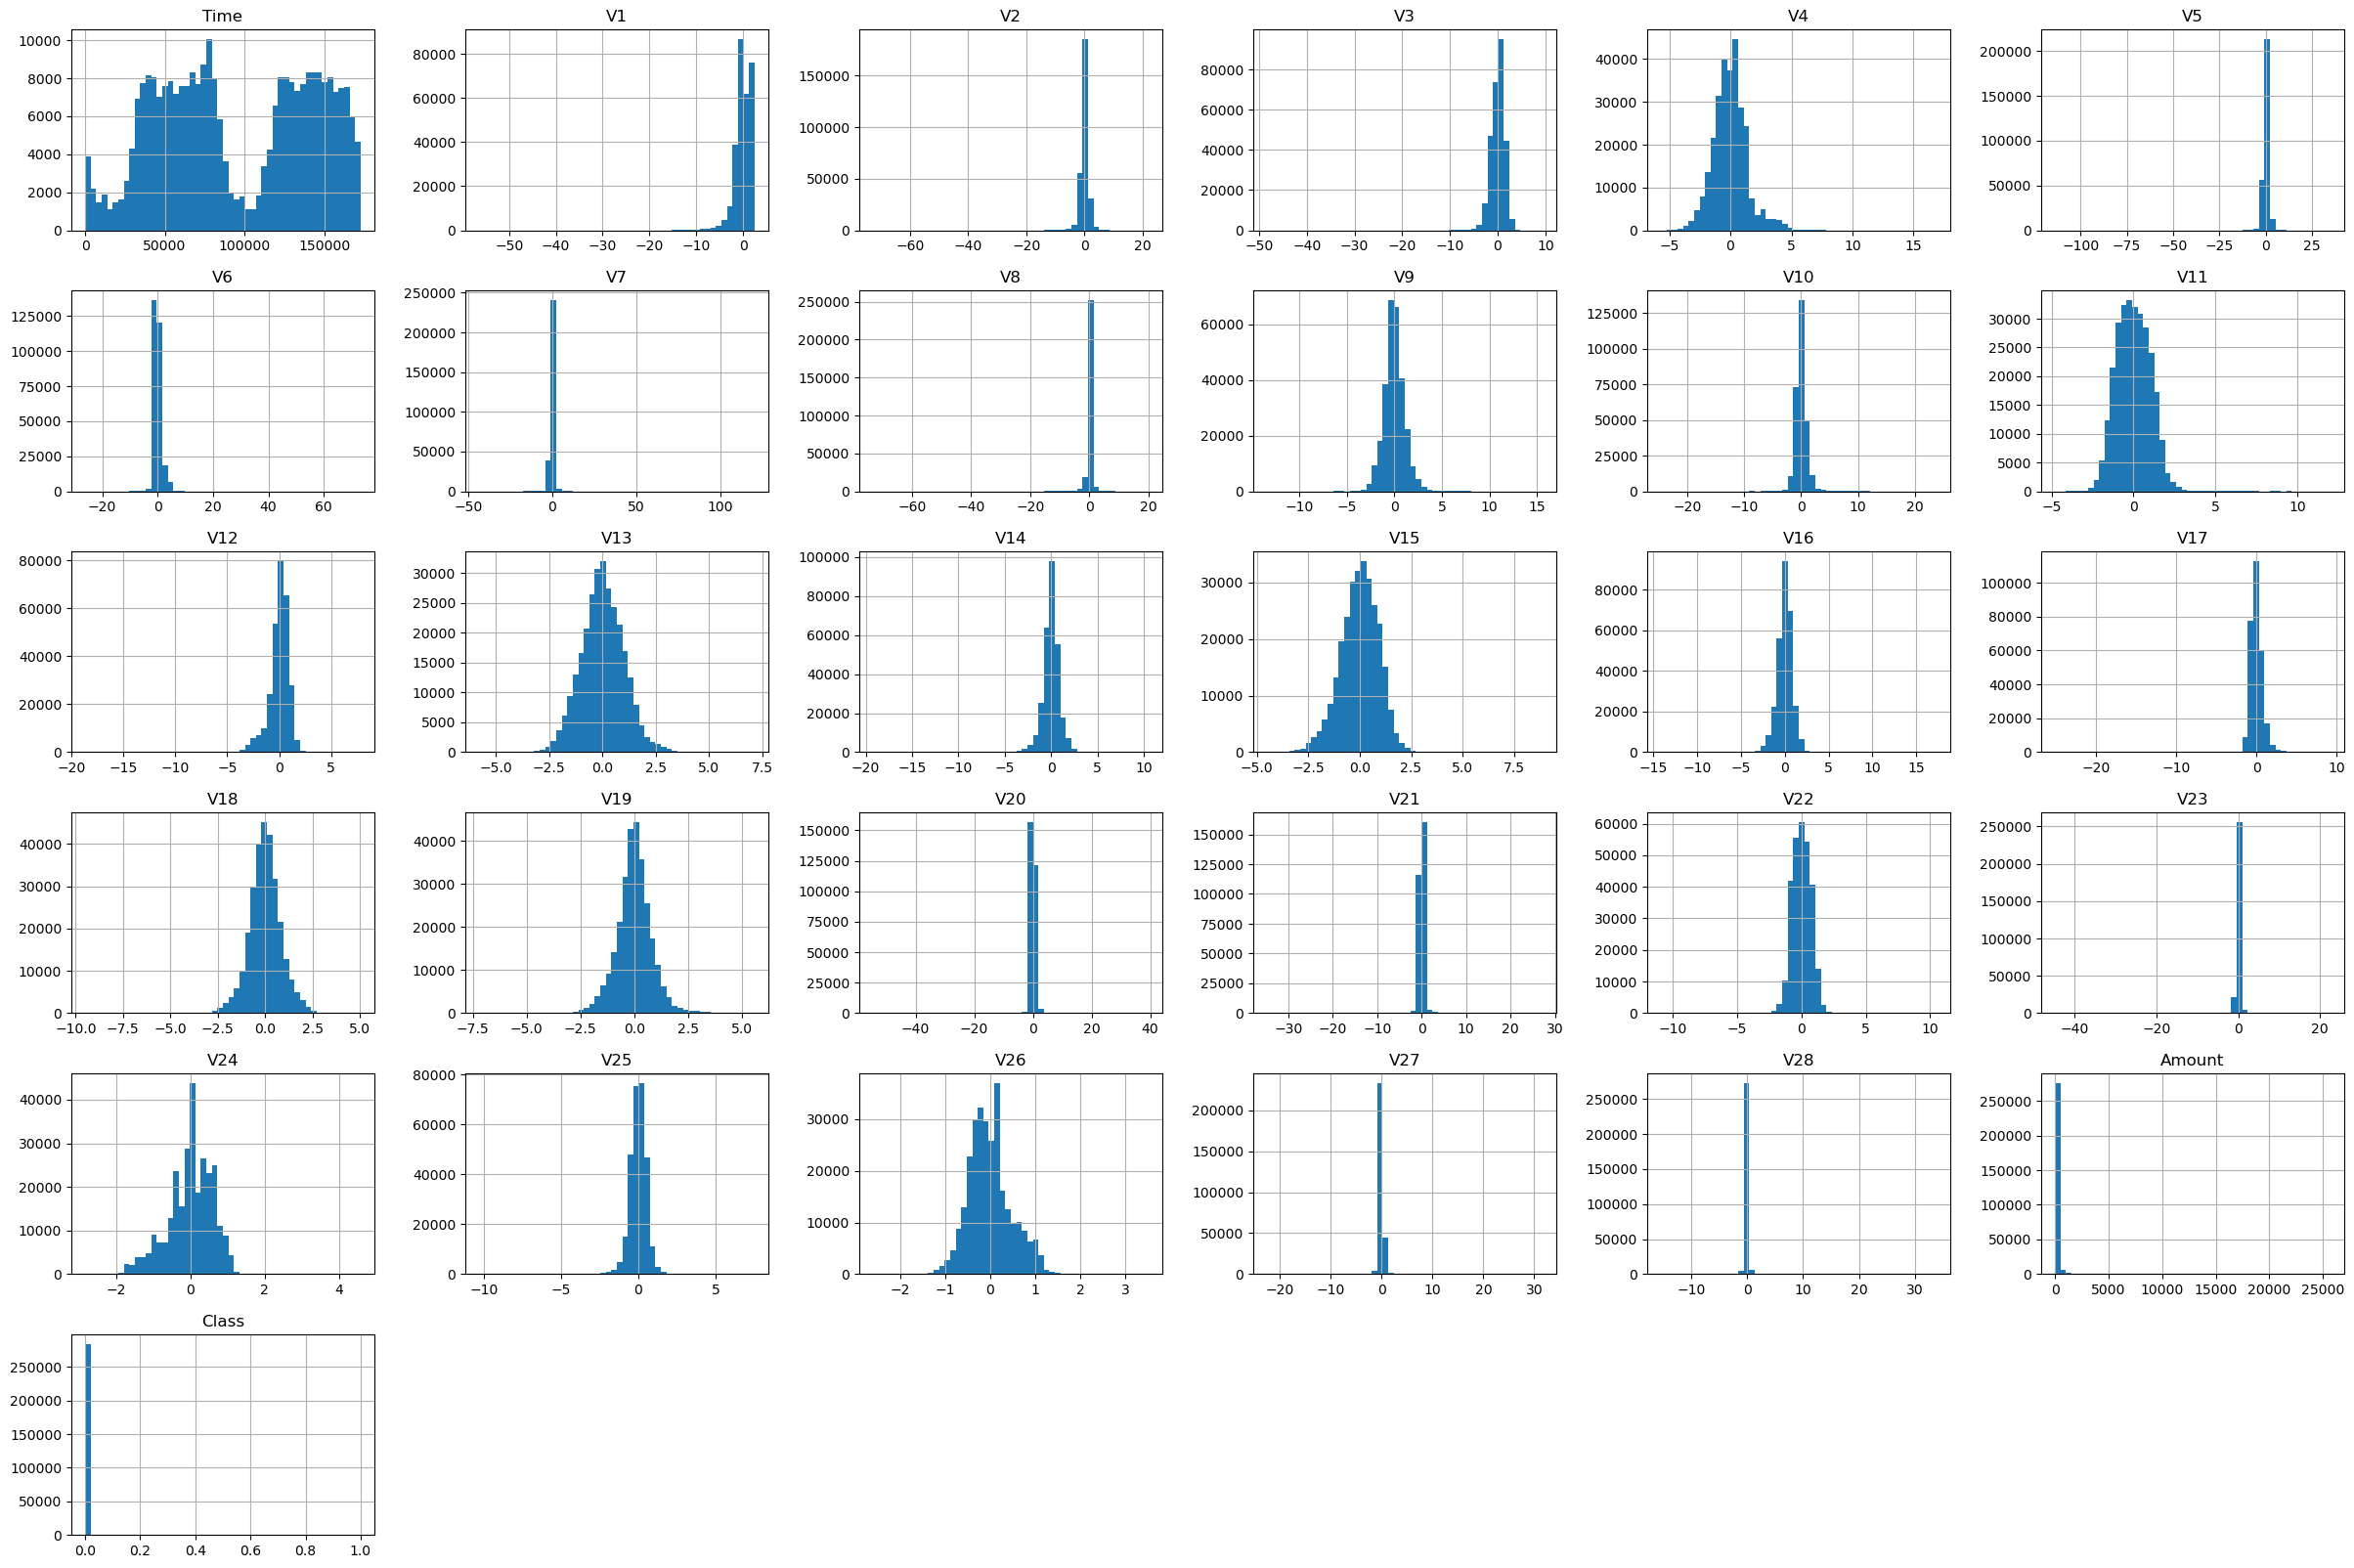

In [12]:
# Plot the histograms of each 
data.hist(bins=50, figsize=(30,20))
plt.show()

We can observe that all the features in dataset are scaled except amount and time. So, in next step I am going to scale Amount column in dataset and delete time column.

In [14]:
data['normal_amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount','Time'], axis=1)
X = data.loc[:,data.columns != 'Class']
y = data.loc[:,data.columns == 'Class']

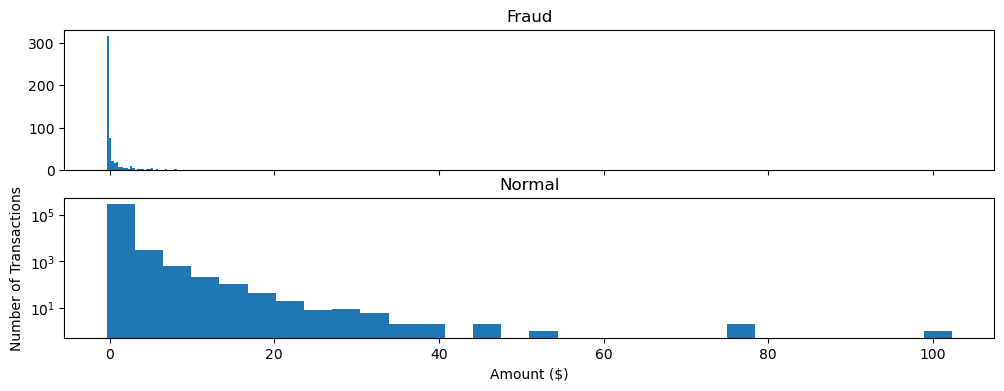

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(data.normal_amount[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.normal_amount[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Text(0, 0.5, 'Frequency')

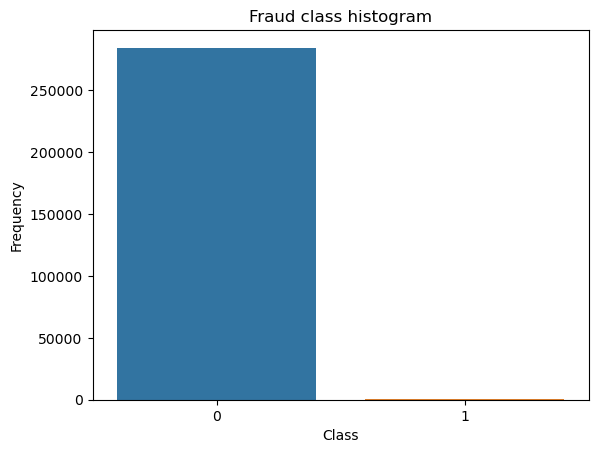

In [16]:
# Now lets check the class distributions
sns.countplot(x="Class",data=data)
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [17]:
# Showing ratio
print("Percentage of normal transactions: ", len(data[data.Class == 0])/len(data))
print("Percentage of fraud transactions: ", len(data[data.Class == 1])/len(data))
print("Total number of transactions in data: ", len(data))

Percentage of normal transactions:  0.9982725143693799
Percentage of fraud transactions:  0.001727485630620034
Total number of transactions in data:  284807


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 29)
(85443, 29)
(199364, 1)
(85443, 1)


In [21]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

Logistic Regression Cross Validation Score(Recall):  61.74
Recall: 0.6190476190476191
Log Loss: 0.028685421046311402
Precision: 0.883495145631068
Accurcay: 0.999204147794436
AUC:  0.8094534662486266
F1 Score: 0.728
Confusion matrix:
 [[85284    12]
 [   56    91]]


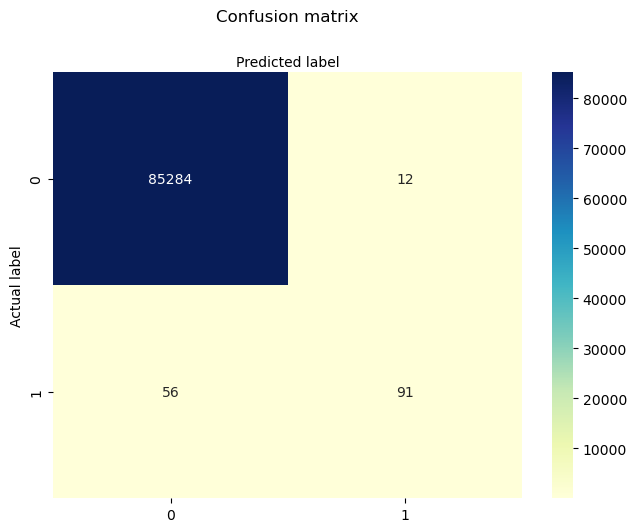

In [22]:
# Accuracy metrics for 
y_pred = lr.predict(X_test)
cross_validation_metrics(lr,X_train,y_train)
print_accuracy_metrics(y_test,y_pred)

Observatios By observing the accuracy we can conclude that algorithm is performing extremely well . But it’s not true. As most of the labels 0, even random guess gives you 99% accuracy. So we need a better measure to understand the performance of the model.

Recall Recall is a measure which measures the ability of model to predict right for a given label. In our case, we want to test the model how accurately it can recall fraud cases as we are interested in that. As you can observe from the results, the recall for 1.0 is only 0.6016 compared to 99% for 0. So our model is not doing a good job of recognising frauds. So this shows that how imbalanced data is effecting accuracy of model.

2] Using Class Weight (Logistic regression) Scikit-learn logistic regression has a option named class_weight when specified does class imbalance handling implicitly. So trying to predict using this technique

In [23]:
lr_balanced = LogisticRegression(class_weight = 'balanced')
lr_balanced.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

Logistic Regression Cross Validation Score(Recall):  89.86
Recall: 0.9115646258503401
Log Loss: 0.8230184773728403
Precision: 0.06467181467181467
Accurcay: 0.9771660639256581
AUC:  0.9444218739831329
F1 Score: 0.12077512392969804
Confusion matrix:
 [[83358  1938]
 [   13   134]]


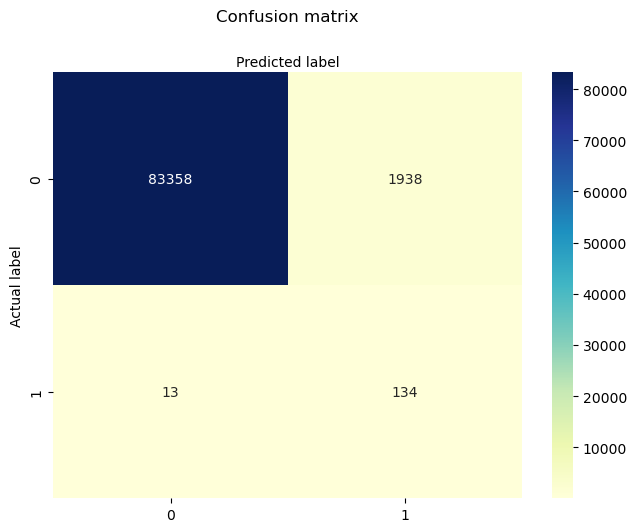

In [24]:
y_balanced_pred = lr_balanced.predict(X_test)
cross_validation_metrics(lr_balanced,X_train,y_train)
print_accuracy_metrics(y_test,y_balanced_pred)

In [25]:
y_balanced_pred_prob = lr_balanced.predict_proba(X_test)[:, 1]

In [26]:
print('Prob:', y_balanced_pred_prob[0:20])

Prob: [0.11787737 0.10846437 0.16225886 0.04103306 0.06945814 0.80536086
 0.33631759 0.01522809 0.01659318 0.45299479 0.03836546 0.02968987
 0.0013642  0.00311836 0.00773784 0.05655792 0.01762419 0.00896546
 0.09345336 0.0514922 ]


In [27]:
print('Prob:', y_balanced_pred[0:20])

Prob: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Undersampling of the dataset Undersampling is one of the techniques used for handling class imbalance. In this technique, we under sample majority class to match the minority class. So in our example, we take random sample of non-fraud class to match number of fraud samples. This makes sure that the training data has equal amount of fraud and non-fraud samples.

In [28]:
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

In [29]:
normal_indices = data[data.Class == 0].index

In [30]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

In [31]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

In [32]:
under_sample = data.iloc[under_sample_indices,:]

In [33]:
under_sample.shape

(984, 30)

So there are total 984 observations in our undersample dataframe.

Visualising Undersampled Data.

Text(0, 0.5, 'Frequency')

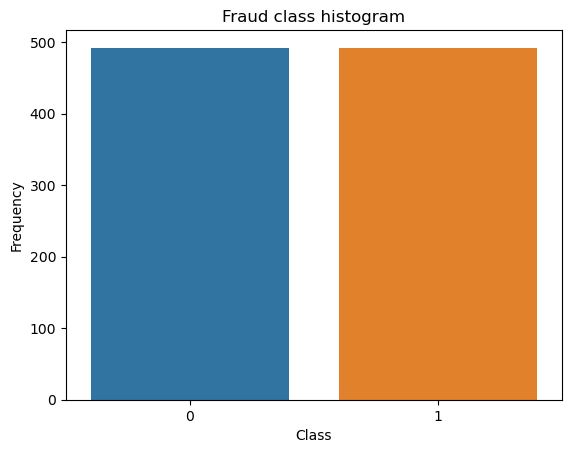

In [34]:
# Now lets check the class distributions
sns.countplot(x="Class",data=under_sample)
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

<Axes: >

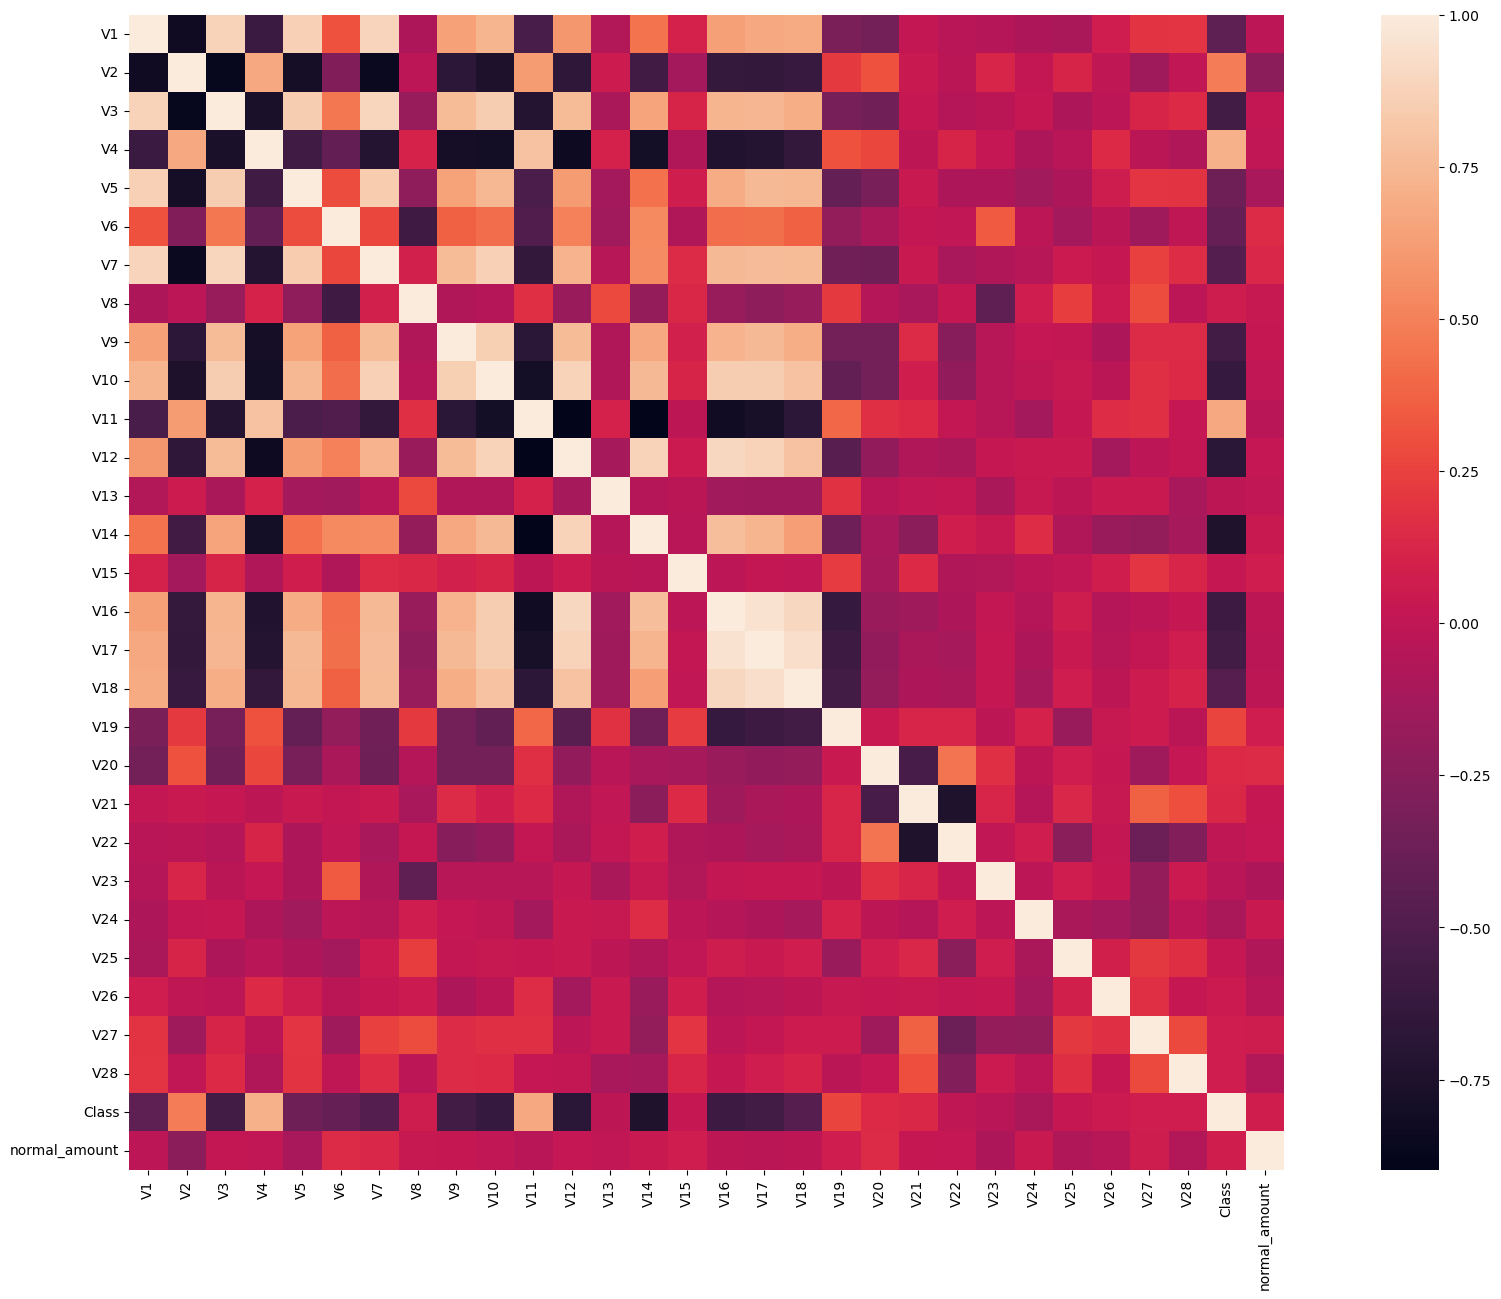

In [35]:
# correlation matrix
corrmat =under_sample.corr()
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(corrmat,square=True)

Splitting under sampled dataframe.

In [37]:
X_under = under_sample.loc[:,under_sample.columns != 'Class']
y_under = under_sample.loc[:,under_sample.columns == 'Class']
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.3, random_state = 0)

In [38]:
rf = RandomForestClassifier(n_estimators=100, 
                            criterion='gini', 
                            max_features='sqrt',
                            n_jobs=-1)
rf.fit(X_under_train, y_under_train)

RandomForestClassifier(n_jobs=-1)

In [46]:
importances = rf.feature_importances_

In [47]:
importances

array([0.00875411, 0.0224899 , 0.03240118, 0.09152657, 0.00730521,
       0.0092113 , 0.04461483, 0.01345041, 0.02129713, 0.15284919,
       0.05590445, 0.09395642, 0.00708047, 0.17266954, 0.00821725,
       0.05154698, 0.07414977, 0.01654619, 0.01341565, 0.01092812,
       0.02565616, 0.00732215, 0.00836389, 0.00725941, 0.00870673,
       0.00799724, 0.00941671, 0.00574127, 0.01122175])

In [48]:
#negative correlations smaller than -0.5
corr = under_sample.corr()
corr = corr[['Class']]
corr[corr.Class < -0.6]

,Class
V10,-0.628424
V12,-0.683615
V14,-0.747346


In [49]:
#positive correlations greater than 0.5
corr[corr.Class > 0.6]

,Class
V4,0.717340
V11,0.680493
Class,1.000000


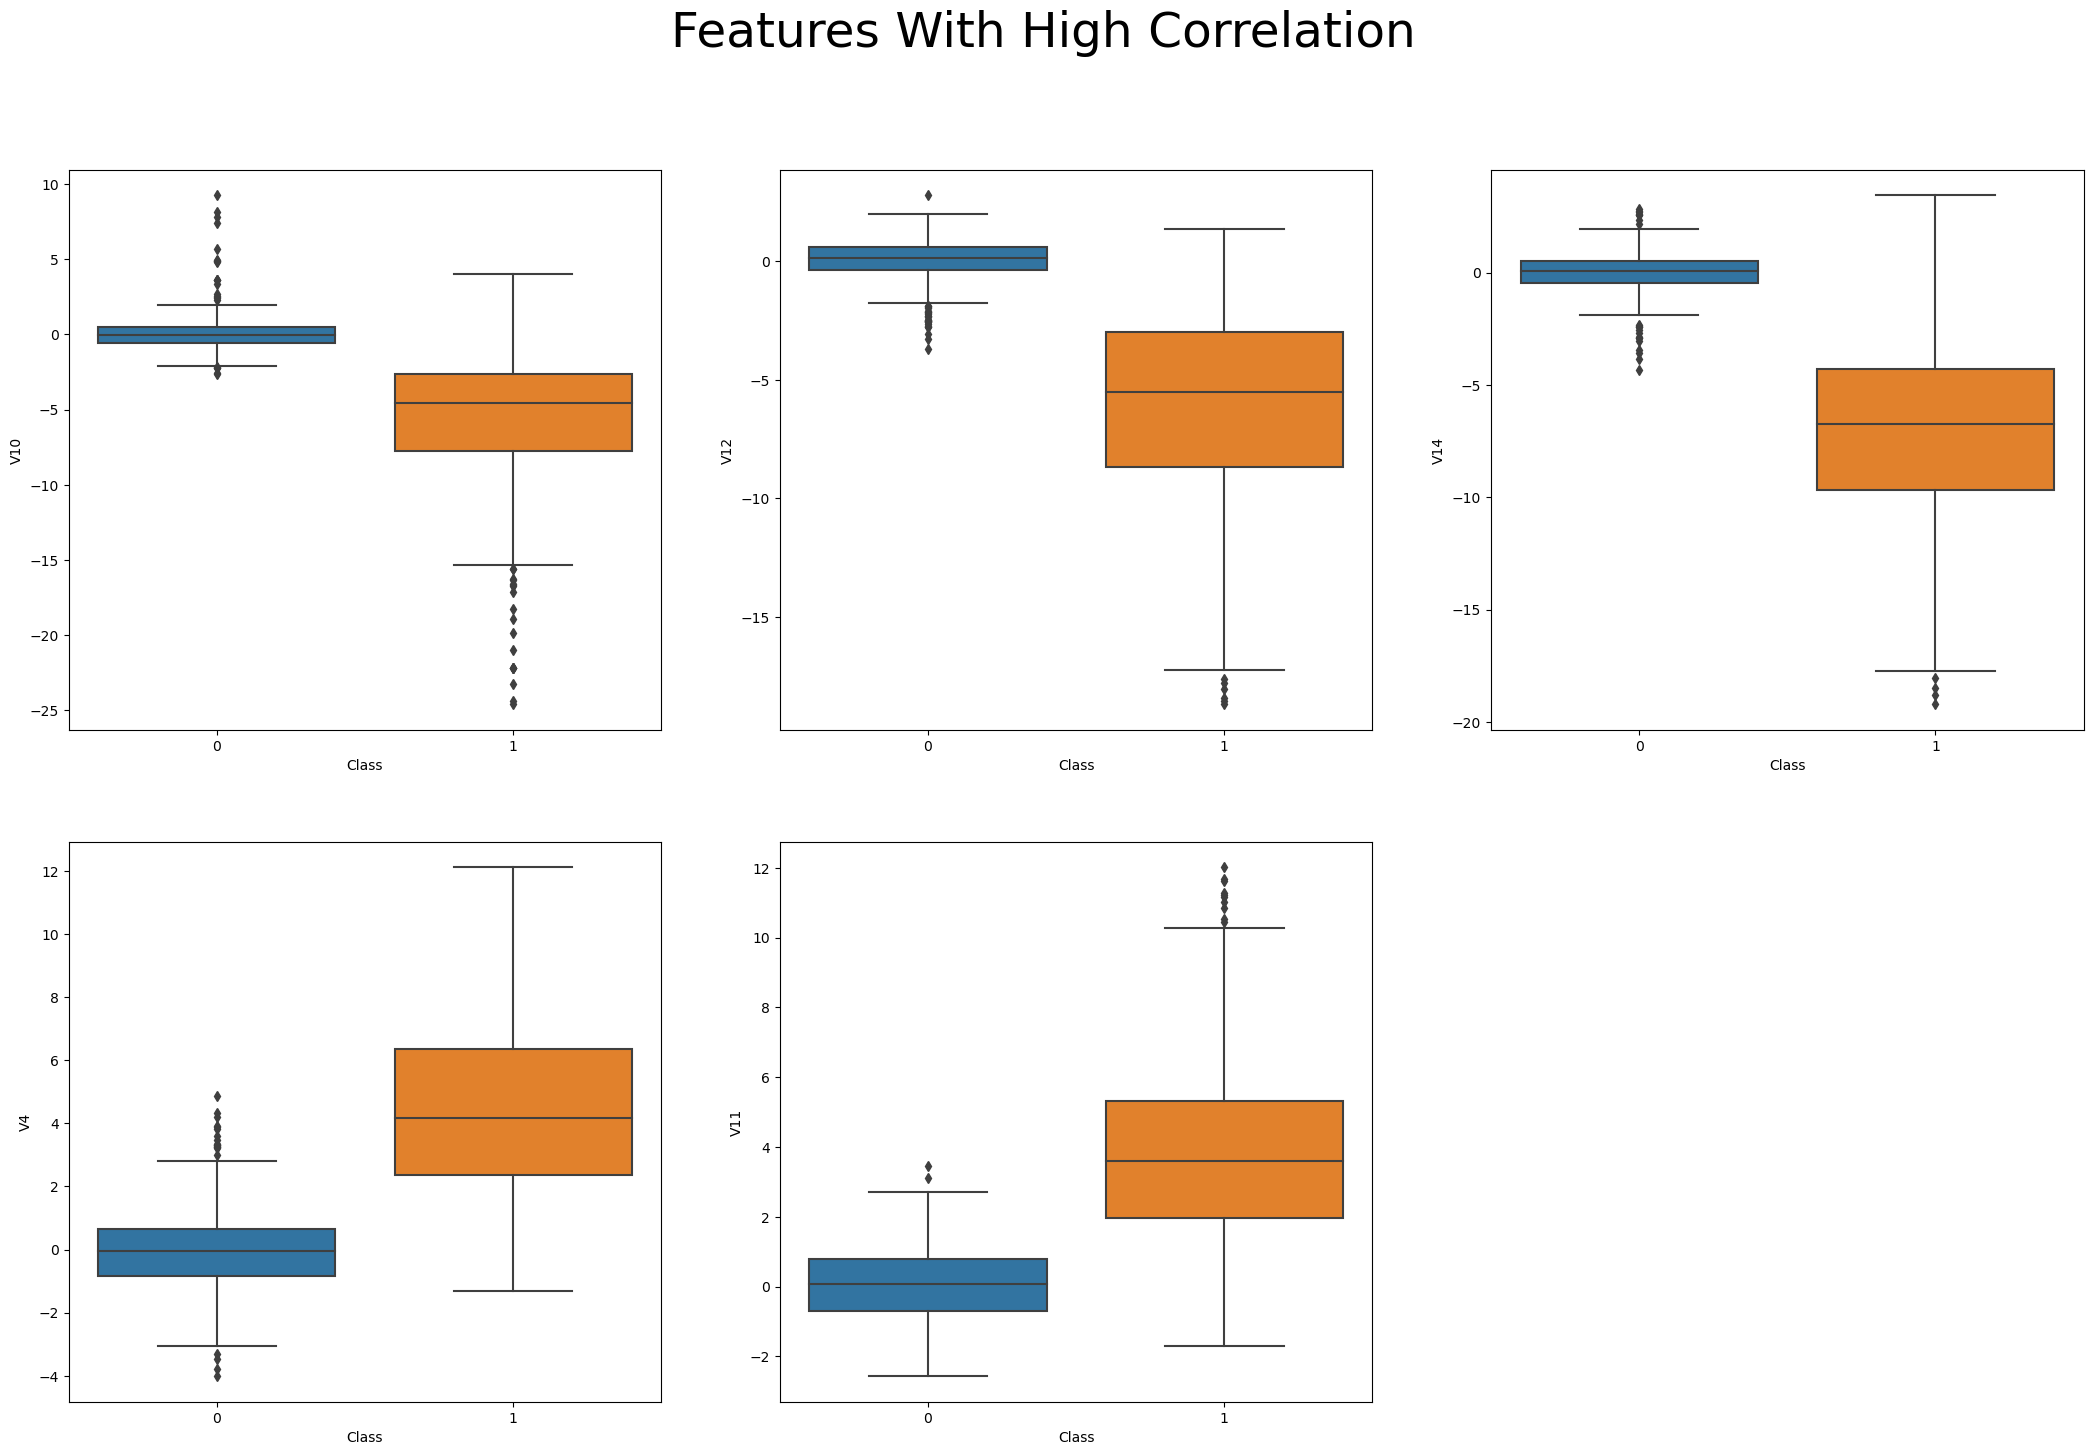

In [50]:
#visualizing the features with high correlation
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(26,16))
f.suptitle('Features With High Correlation', size=35)
sns.boxplot(x="Class", y="V10", data=under_sample, ax=axes[0,0])
sns.boxplot(x="Class", y="V12", data=under_sample, ax=axes[0,1])
sns.boxplot(x="Class", y="V14", data=under_sample, ax=axes[0,2])
sns.boxplot(x="Class", y="V4", data=under_sample, ax=axes[1,0])
sns.boxplot(x="Class", y="V11", data=under_sample, ax=axes[1,1])
f.delaxes(axes[1,2])


In [51]:
under_sample.shape

(984, 30)

3] Logistic regression with C=0.01.

In [52]:
# lr_under_C2 = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

lr_under_C1 = LogisticRegression(C=0.01,penalty = 'l1',solver='liblinear')
lr_under_C1.fit(X_under_train,y_under_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

Logistic Regression Cross Validation Score(Recall):  96.23
Recall: 0.9183673469387755
Log Loss: 3.099712850710214
Precision: 0.018069870164636594
Accurcay: 0.9140011469634727
AUC:  0.9161804845742461
F1 Score: 0.03544237332633237
Confusion matrix:
 [[77960  7336]
 [   12   135]]


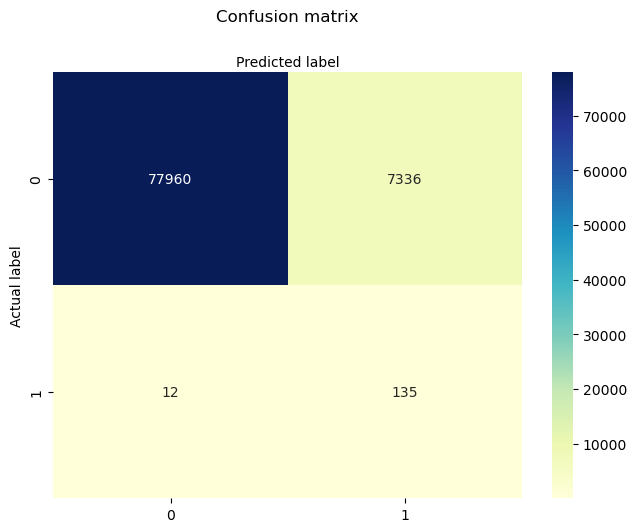

In [53]:
#  Prediction on original dataframe
y_pred_full_model1 = lr_under_C1.predict(X_test)
cross_validation_metrics(lr_under_C1,X_under_train,y_under_train)
print_accuracy_metrics(y_test,y_pred_full_model1)

3] Logistic regression with C=0.1.

In [54]:
lr_under_C2 = LogisticRegression(C=0.1,penalty = 'l1',solver='liblinear')
lr_under_C2.fit(X_under_train,y_under_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

Logistic Regression Cross Validation Score(Recall):  88.99
Recall: 0.9047619047619048
Log Loss: 0.6154710192142357
Precision: 0.08428390367553866
Accurcay: 0.9829242887070913
AUC:  0.9439104496610123
F1 Score: 0.15420289855072467
Confusion matrix:
 [[83851  1445]
 [   14   133]]


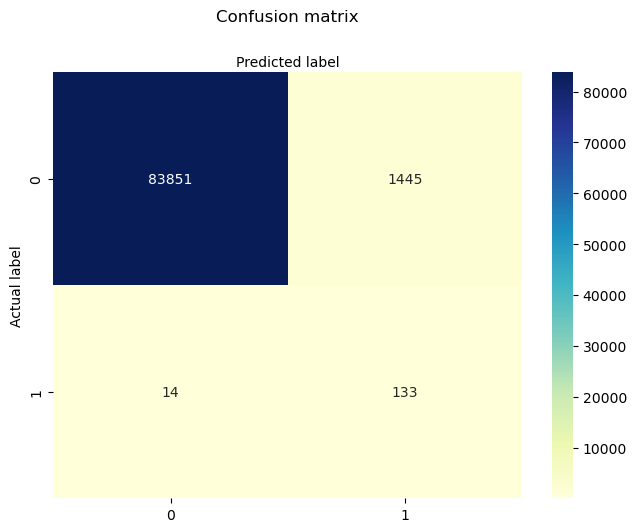

In [55]:
# Prediction on original dataset
y_pred_full_model2 = lr_under_C2.predict(X_test)
cross_validation_metrics(lr_under_C2,X_under_train,y_under_train)
print_accuracy_metrics(y_test,y_pred_full_model2)

3] Logistic regression with C=1.

In [56]:
lr_under_C3 = LogisticRegression(C=1,penalty = 'l1',solver='liblinear')
lr_under_C3.fit(X_under_train,y_under_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

Logistic Regression Cross Validation Score(Recall):  90.14
Recall: 0.9319727891156463
Log Loss: 0.8449543875847253
Precision: 0.06431924882629109
Accurcay: 0.9765574710625797
AUC:  0.9543035489378643
F1 Score: 0.12033377250768557
Confusion matrix:
 [[83303  1993]
 [   10   137]]


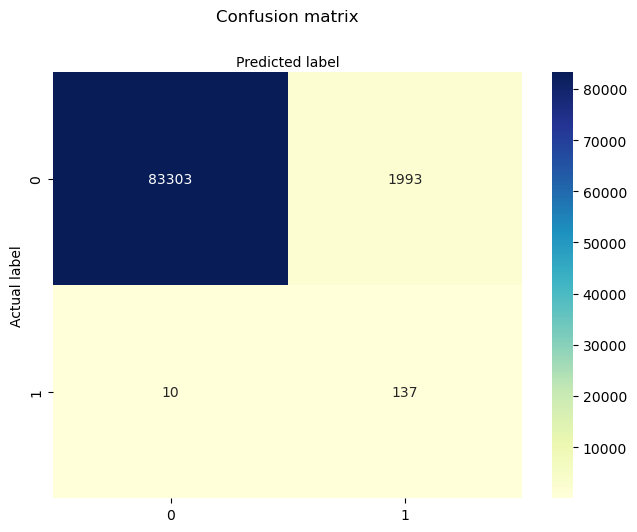

In [57]:
# Prediction on original dataset
y_pred_full_model3 = lr_under_C3.predict(X_test)
cross_validation_metrics(lr_under_C3,X_under_train,y_under_train)
print_accuracy_metrics(y_test,y_pred_full_model3)

3] Logistic regression with C=10.

In [58]:
lr_under_C4 = LogisticRegression(C=10,penalty = 'l1',solver='liblinear')
lr_under_C4.fit(X_under_train,y_under_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

Logistic Regression Cross Validation Score(Recall):  91.3
Recall: 0.9319727891156463
Log Loss: 1.030144091104293
Precision: 0.053328143246399375
Accurcay: 0.9714195428531301
AUC:  0.9517301574540902
F1 Score: 0.10088365243004419
Confusion matrix:
 [[82864  2432]
 [   10   137]]


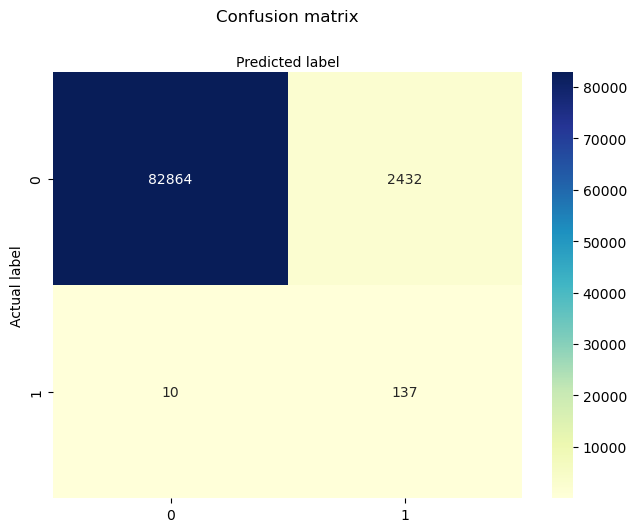

In [59]:
# Prediction on original dataset
y_pred_full_model4 = lr_under_C4.predict(X_test)
cross_validation_metrics(lr_under_C4,X_under_train,y_under_train)
print_accuracy_metrics(y_test,y_pred_full_model4)

7] Decision Tree Classifier.


In [60]:
DecisionTreeClassifier= DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_under_train,y_under_train)

DecisionTreeClassifier()

Logistic Regression Cross Validation Score(Recall):  88.12
Recall: 0.9319727891156463
Log Loss: 4.193133605887252
Precision: 0.0136088208999702
Accurcay: 0.8836651334808001
AUC:  0.9077773343439797
F1 Score: 0.026825925200704915
Confusion matrix:
 [[75366  9930]
 [   10   137]]


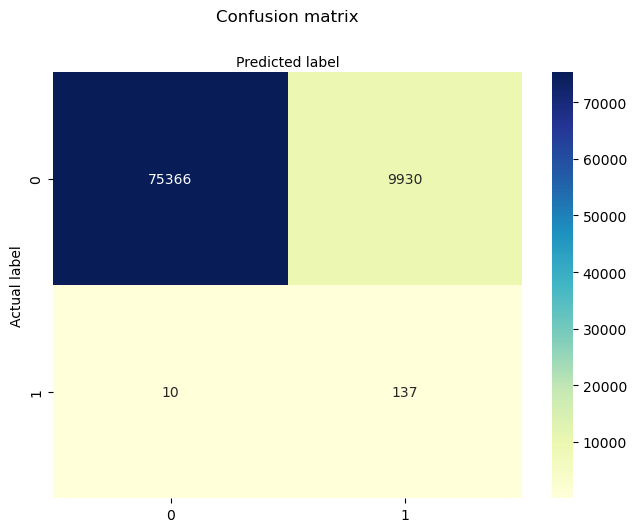

In [61]:
# Prediction on original dataset
y_pred_DecisionTree = DecisionTreeClassifier.predict(X_test)
cross_validation_metrics(DecisionTreeClassifier,X_under_train,y_under_train)
print_accuracy_metrics(y_test,y_pred_DecisionTree)

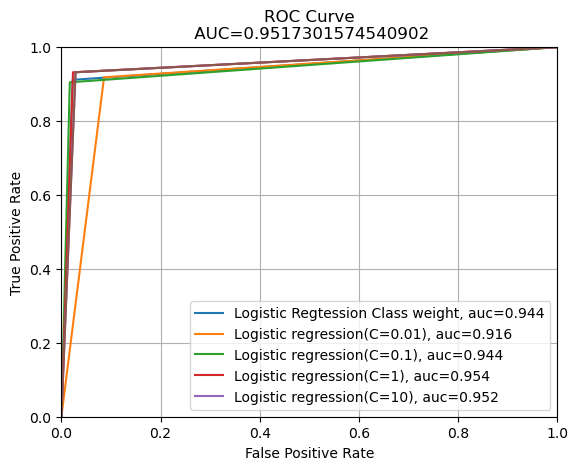

In [62]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(y_test, y_balanced_pred)
auc = metrics.roc_auc_score(y_test, y_balanced_pred)
plt.plot(fpr,tpr,label="Logistic Regtession Class weight, auc="+ '{0:.3f}'.format(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_full_model1)
auc = metrics.roc_auc_score(y_test, y_pred_full_model1)
plt.plot(fpr,tpr,label="Logistic regression(C=0.01), auc="+ '{0:.3f}'.format(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_full_model2)
auc = metrics.roc_auc_score(y_test, y_pred_full_model2)
plt.plot(fpr,tpr,label="Logistic regression(C=0.1), auc="+'{0:.3f}'.format(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_full_model3)
auc = metrics.roc_auc_score(y_test, y_pred_full_model3)
plt.plot(fpr,tpr,label="Logistic regression(C=1), auc="+'{0:.3f}'.format(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_full_model4)
auc = metrics.roc_auc_score(y_test, y_pred_full_model4)
plt.plot(fpr,tpr,label="Logistic regression(C=10), auc="+'{0:.3f}'.format(auc))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve\n AUC={auc}'.format(auc = auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc="lower right")


Obviously, trying to increase recall, tends to come with a decrease of precision. However, in our case, if we predict that a transaction is fraudulent and turns out not to be, is not a massive problem compared to the opposite and logestic regression with c=0.1 is best mode..

we can also try Ann for that problem

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, 
                                                            test_size=0.2, random_state=42)

In [64]:
scaler=StandardScaler()

In [65]:
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)
X_test = scaler.transform(X_test)

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

In [67]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [68]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])


In [69]:
model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=["accuracy"])

In [70]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_validate, y_validate)) # fitting the model to training data

Epoch 1/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8497 - loss: 0.3398 - val_accuracy: 0.9991 - val_loss: 0.0181
Epoch 2/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9990 - loss: 0.0074 - val_accuracy: 0.9991 - val_loss: 0.0150
Epoch 3/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9991 - loss: 0.0053 - val_accuracy: 0.9993 - val_loss: 0.0156
Epoch 4/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9991 - loss: 0.0052 - val_accuracy: 0.9992 - val_loss: 0.0168
Epoch 5/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9991 - loss: 0.0051 - val_accuracy: 0.9993 - val_loss: 0.0163
Epoch 6/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9992 - val_loss: 0.0125
Epoch 7/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9993 - val_loss: 0.0104
Epoch 8/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9993 - loss: 0

In [71]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step - accuracy: 0.9993 - loss: 0.0122
[0.011517144739627838, 0.9992977976799011]


In [72]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 809us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step
Train Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999736    0.819398  0.999398       0.909567       0.999412
recall          0.999661    0.853659  0.999398       0.926660       0.999398
f1-score        0.999698    0.836177  0.999398       0.917938       0.999404
support    159204.000000  287.000000  0.999398  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159150     54]
 [    42    245]]

Test Result:
Accuracy Score: 99.93%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999789    0.737500  0.999298      0.868644      0.999371
recall         0.999508    0.867647  0.999298      0.93357

its give 99.93% accuracy its like overfitting so thats why we use logastic regression model.